In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.columns, df.shape


(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'), (1599, 12))

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['label']=df['quality']>6

In [7]:
df = df.fillna(df.mean())
df = df.drop(columns=['quality'])


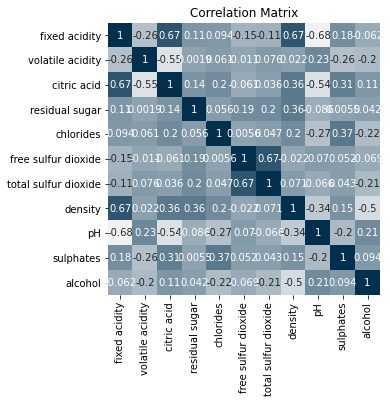

In [8]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'] 

corr = df[features].corr()

_, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(
    corr, 
    cmap=sns.light_palette("#00304e", as_cmap=True), 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 10}
)

_ = ax.set_title("Correlation Matrix", fontsize=12)


<Figure size 432x288 with 0 Axes>

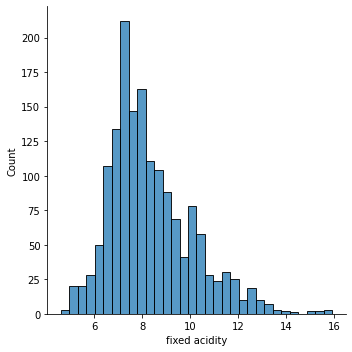

<Figure size 432x288 with 0 Axes>

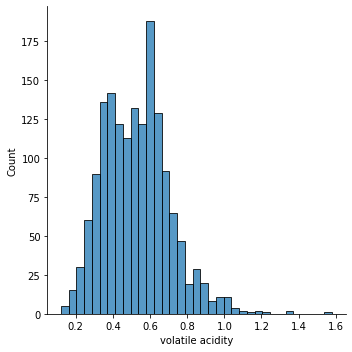

<Figure size 432x288 with 0 Axes>

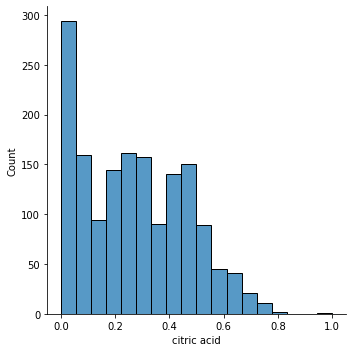

<Figure size 432x288 with 0 Axes>

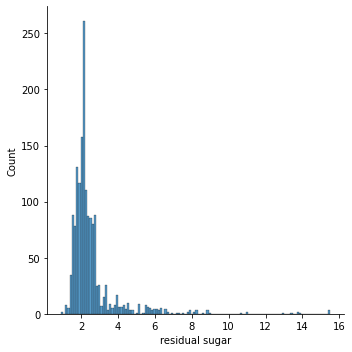

<Figure size 432x288 with 0 Axes>

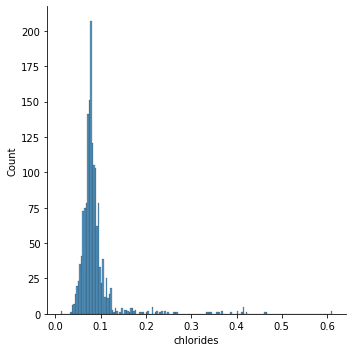

<Figure size 432x288 with 0 Axes>

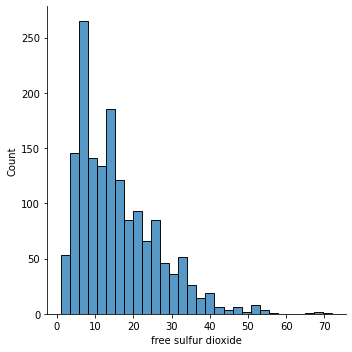

<Figure size 432x288 with 0 Axes>

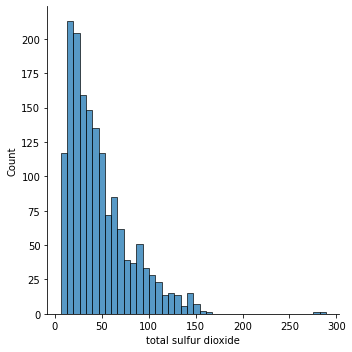

<Figure size 432x288 with 0 Axes>

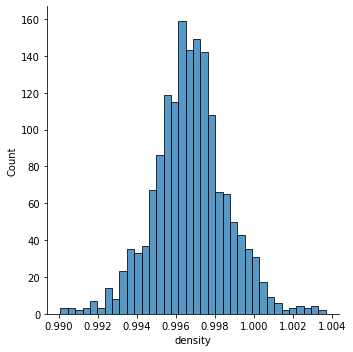

<Figure size 432x288 with 0 Axes>

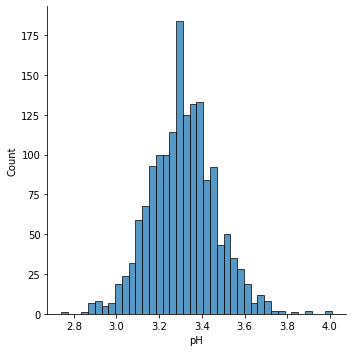

<Figure size 432x288 with 0 Axes>

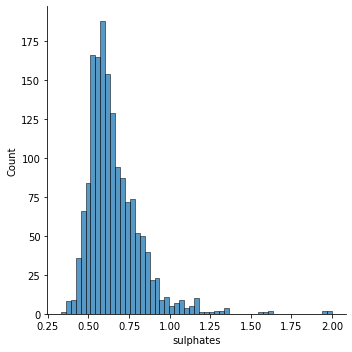

In [9]:
for i in range(len(features)-1):
    figure = plt.figure()
    ax = sns.displot(df[features[i]])


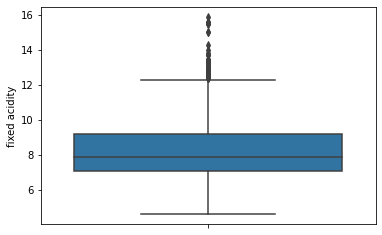

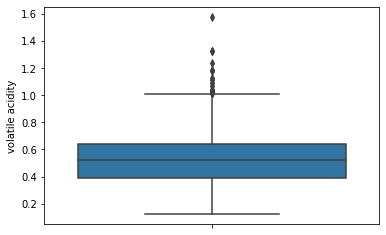

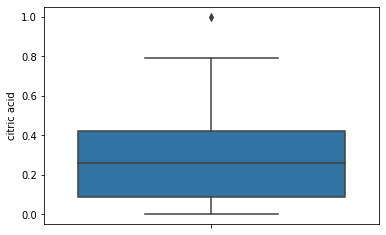

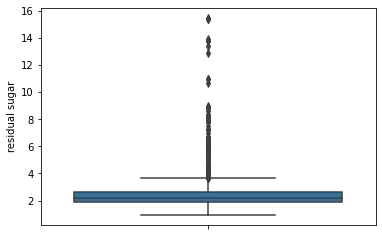

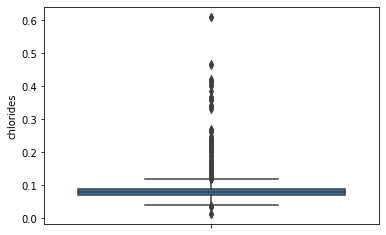

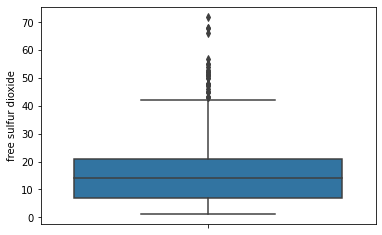

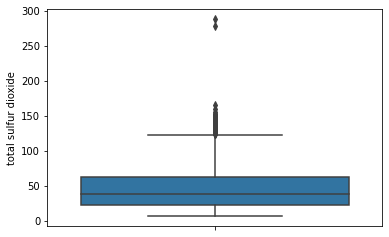

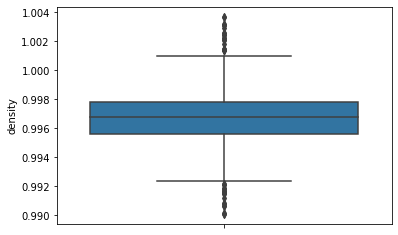

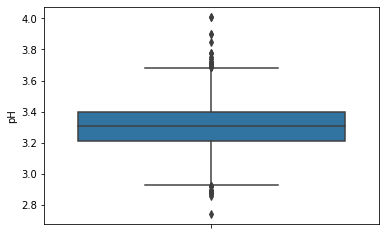

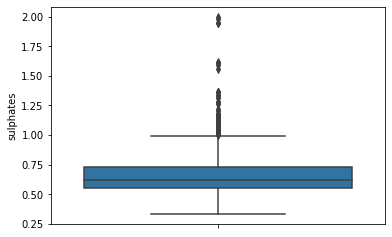

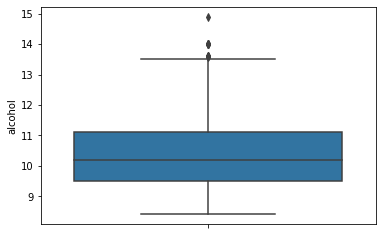

In [10]:
for s in features:
    figure = plt.figure()
    ax = sns.boxplot(y=s, data=df)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y=df['label']
x=df.drop(columns='label')

In [13]:
x_train, x_test, y_train, y_test=train_test_split(   x, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [15]:
score=[]
for i in (3,5,7):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    predicted=model.predict(x_test)
    score.append(f1_score(y_test,predicted))
best_i=(score.index(max(score))+1)*2+1
print(best_i,'  ',max(score))

3    0.31304347826086953


# Decision tree

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [17]:
from sklearn import tree

In [18]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
print(f1_score(y_test,predicted))

0.49382716049382713


In [44]:
predicted=clf.predict(x_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

[[406  37]
 [ 45  40]]
              precision    recall  f1-score   support

       False       0.92      0.90      0.91       451
        True       0.47      0.52      0.49        77

    accuracy                           0.84       528
   macro avg       0.69      0.71      0.70       528
weighted avg       0.85      0.84      0.85       528



In [19]:
tree.export_graphviz(clf)


'digraph Tree {\nnode [shape=box] ;\n0 [label="X[10] <= 11.55\\ngini = 0.227\\nsamples = 1071\\nvalue = [931, 140]"] ;\n1 [label="X[1] <= 0.375\\ngini = 0.129\\nsamples = 908\\nvalue = [845, 63]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[7] <= 0.995\\ngini = 0.341\\nsamples = 156\\nvalue = [122, 34]"] ;\n1 -> 2 ;\n3 [label="X[1] <= 0.265\\ngini = 0.48\\nsamples = 20\\nvalue = [8, 12]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n3 -> 4 ;\n5 [label="X[2] <= 0.405\\ngini = 0.375\\nsamples = 16\\nvalue = [4, 12]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 9\\nvalue = [0, 9]"] ;\n5 -> 6 ;\n7 [label="X[9] <= 0.77\\ngini = 0.49\\nsamples = 7\\nvalue = [4, 3]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n7 -> 9 ;\n10 [label="X[2] <= 0.665\\ngini = 0.271\\nsamples = 136\\nvalue = [114, 22]"] ;\n2 -> 10 ;\n11 [label="X[4] <= 0.061\\ngini

[Text(177.75294502617803, 209.6742857142857, 'X[10] <= 11.55\ngini = 0.227\nsamples = 1071\nvalue = [931, 140]'),
 Text(80.74201570680628, 194.14285714285714, 'X[1] <= 0.375\ngini = 0.129\nsamples = 908\nvalue = [845, 63]'),
 Text(28.04607329842932, 178.61142857142858, 'X[7] <= 0.995\ngini = 0.341\nsamples = 156\nvalue = [122, 34]'),
 Text(7.01151832460733, 163.07999999999998, 'X[1] <= 0.265\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(3.505759162303665, 147.54857142857142, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(10.517277486910995, 147.54857142857142, 'X[2] <= 0.405\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(7.01151832460733, 132.01714285714286, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(14.02303664921466, 132.01714285714286, 'X[9] <= 0.77\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(10.517277486910995, 116.48571428571428, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(17.528795811518325, 116.48571428571428, 'gini = 0.0\nsamples = 3\nvalue 

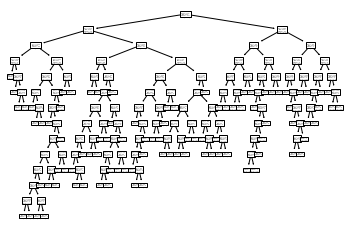

In [20]:
tree.plot_tree(clf)


In [21]:
from sklearn.svm import SVC
clf_svc=SVC()
clf_svc.fit(x_train,y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


In [23]:
clf_svc=GridSearchCV(estimator=SVC(),param_grid=param_grid)
clf_svc.fit(x_train,y_train.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
predicted=clf_svc.predict(x_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))
print(clf_svc.best_params_)

[[431  57]
 [ 20  20]]
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       451
        True       0.50      0.26      0.34        77

    accuracy                           0.85       528
   macro avg       0.69      0.61      0.63       528
weighted avg       0.83      0.85      0.83       528

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
params={'n_estimators':[5,10,15,20,25,30,35,40,45,50]}
exm=RandomForestClassifier()
clf_rf=GridSearchCV(exm,params)

In [28]:
clf_rf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [29]:
predicted=clf_rf.predict(x_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

[[430  41]
 [ 21  36]]
              precision    recall  f1-score   support

       False       0.91      0.95      0.93       451
        True       0.63      0.47      0.54        77

    accuracy                           0.88       528
   macro avg       0.77      0.71      0.74       528
weighted avg       0.87      0.88      0.88       528



In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
params={'n_estimators':[5,10,15,20,25,30,35,40,45,50]}
exm=AdaBoostClassifier()
clf_ab=GridSearchCV(exm,params)

In [32]:
clf_ab.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
predicted=clf_rf.predict(x_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))
print(clf_rf.best_params_)

[[430  41]
 [ 21  36]]
              precision    recall  f1-score   support

       False       0.91      0.95      0.93       451
        True       0.63      0.47      0.54        77

    accuracy                           0.88       528
   macro avg       0.77      0.71      0.74       528
weighted avg       0.87      0.88      0.88       528

{'n_estimators': 35}


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
params={'n_estimators':[5,10,15,20,25,30,35,40,45,50]}
exm=GradientBoostingClassifier()
clf_gb=GridSearchCV(exm,params)

In [39]:
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [41]:
predicted=clf_gb.predict(x_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))
print(clf_gb.best_params_)

[[430  54]
 [ 21  23]]
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       451
        True       0.52      0.30      0.38        77

    accuracy                           0.86       528
   macro avg       0.71      0.63      0.65       528
weighted avg       0.84      0.86      0.84       528

{'n_estimators': 40}
